In [ ]:
#%pip install matplotlib
#%pip install seaborn
#%pip install numpy
#%pip install pandas
#%pip install scipy

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [22]:
# Определение ширины каждого поля
colspecs = [
    (0, 21),   # Airport
    (21, 43),  # City
    (43, 49),  # Scheduled_departures
    (50, 56),  # Performed_departures
    (57, 65),  # Enplaned_passengers
    (66, 75),  # Enplaned_revenue_tons_of_freight
    (76, 85)   # Enplaned_revenue_tons_of_mail
]

# Определение имен колонок
column_names = [
    "Airport", "City", "Scheduled_departures", "Performed_departures", 
    "Enplaned_passengers", "Enplaned_revenue_tons_of_freight", "Enplaned_revenue_tons_of_mail"
]

# Загрузка данных
data = pd.read_fwf('data/airportdat.txt', colspecs=colspecs, header=None, names=column_names)

data

,Airport,City,Scheduled_departures,Performed_departures,Enplaned_passengers,Enplaned_revenue_tons_of_freight,Enplaned_revenue_tons_of_mail
0,HARTSFIELD INTL,ATLANTA,285693,288803,22665665,165668.76,93039.48
1,BALTO/WASH INTL,BALTIMORE,73300,74048,4420425,18041.52,19722.93
2,LOGAN INTL,BOSTON,114153,115524,9549585,127815.09,29785.72
3,DOUGLAS MUNI,CHARLOTTE,120210,121798,7076954,36242.84,15399.46
4,OHARE INTL\t C,HICAGO 3,22430,32338,5636383,463.80,40359.38
...,...,...,...,...,...,...,...
129,FOSS FIELD,SIOUX FALLS,6466,6514,226436,1163.97,1556.28
130,MICHIANA REGIONAL,SOUTH BEND,6630,7072,224050,1826.00,212.82
131,SPOKANE INTL,SPOKANE,25315,25837,747329,7827.61,2283.69
132,TALLAHASSEE REGIONAL,TALLAHASSEE,9193,9306,381840,1492.52,699.40


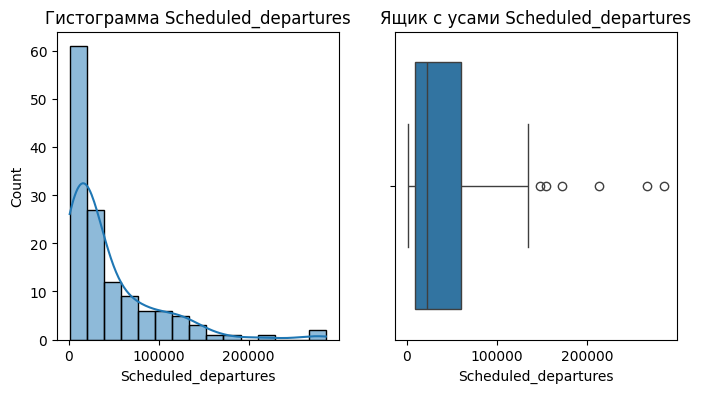

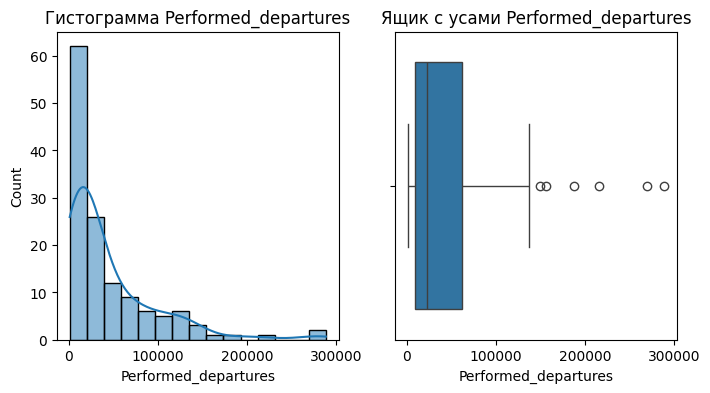

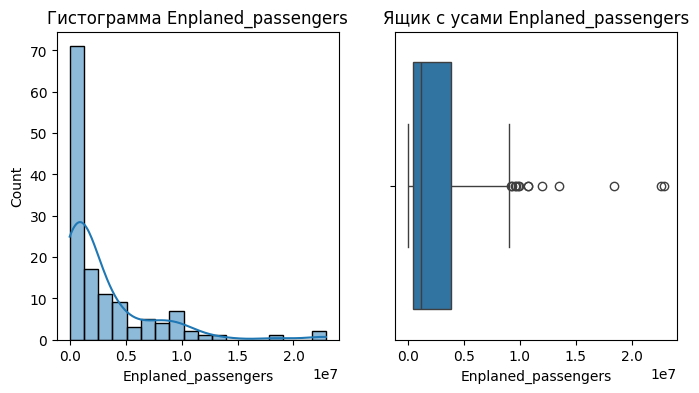

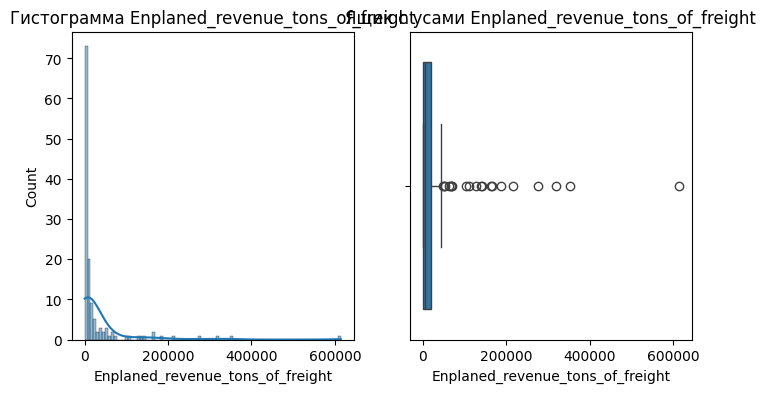

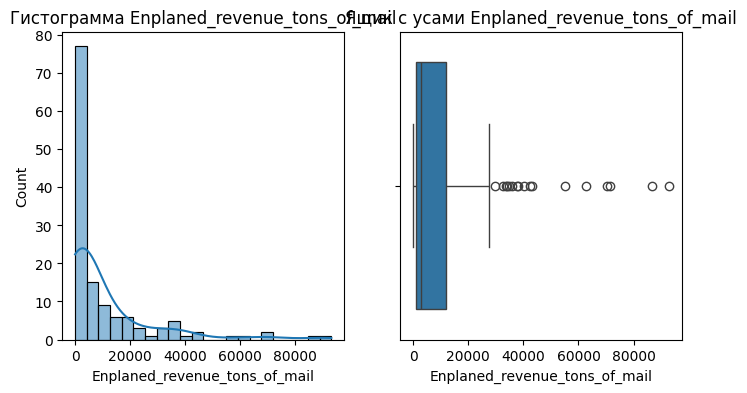

In [23]:
# Выбор переменных для анализа
variables = [
    "Scheduled_departures", "Performed_departures", 
    "Enplaned_passengers", "Enplaned_revenue_tons_of_freight", "Enplaned_revenue_tons_of_mail"
]

# Построение гистограмм и ящиков с усами
for var in variables:
    plt.figure(figsize=(8, 4))
    
    # Гистограмма
    plt.subplot(1, 2, 1)
    sns.histplot(data[var], kde=True)
    plt.title(f'Гистограмма {var}')
    
    # Ящик с усами
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[var])
    plt.title(f'Ящик с усами {var}')
    
    plt.show()


Гистограмма:

Гистограмма показывает, что распределение для переменных имеет сильную правую асимметрию. Основная масса данных сосредоточена вблизи малых значений (ближе к нулю), и лишь небольшое количество данных охватывает большие значения. Это характерно для экспоненциального распределения.

Ящик с усами:

Средний интерквартильный размах указывает, что 50% данных (между первым и третьим квартилем) сосредоточены на относительно небольших значениях.
Усы нессиметричны так как выходят за пределы области значений, наличие большого количества выбросов может показывать что распределение не является нормальным.

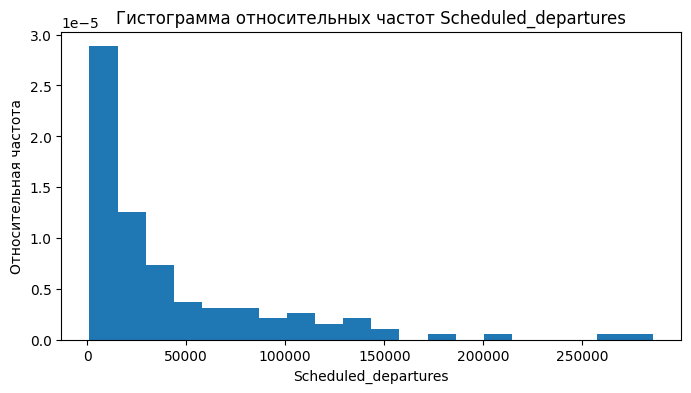

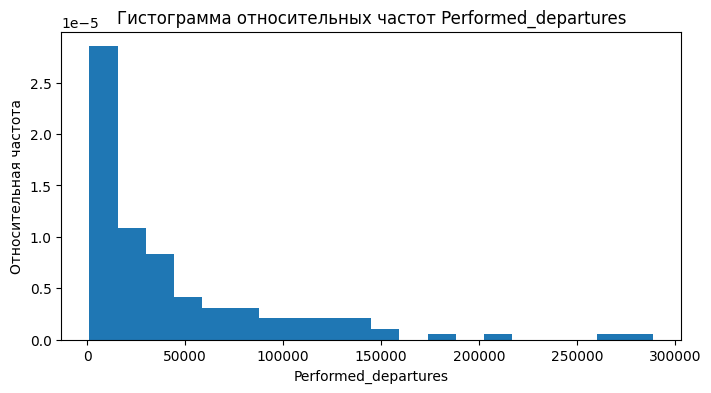

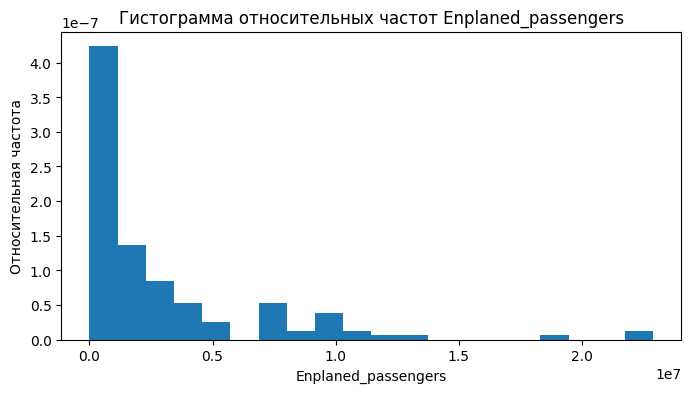

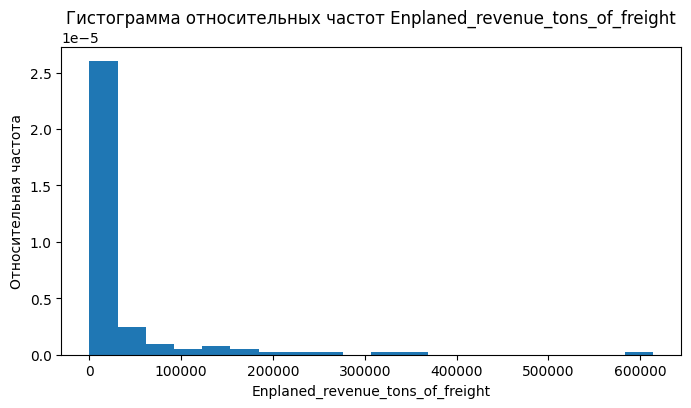

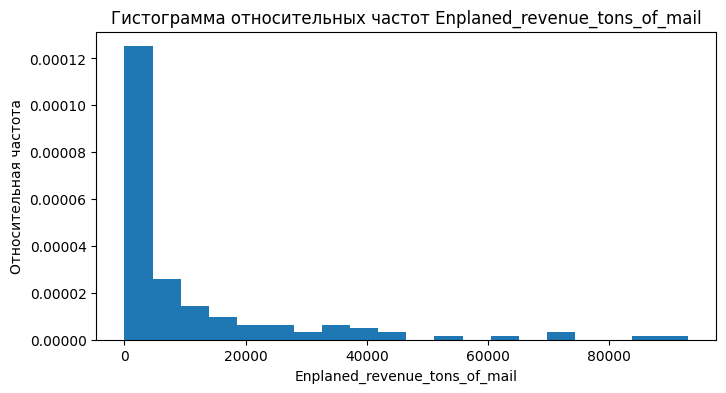

In [24]:
# Построение гистограмм относительных частот
for var in variables:
    plt.figure(figsize=(8, 4))
    
    # Гистограмма относительных частот
    plt.hist(data[var], bins=20, density=True)
    plt.title(f'Гистограмма относительных частот {var}')
    plt.xlabel(var)
    plt.ylabel('Относительная частота')
    
    plt.show()

In [25]:
# Рассчет числовых характеристик и описательной статистики
desc_stats = data[variables].describe().T
desc_stats['variance'] = data[variables].var()
desc_stats['median'] = data[variables].median()
#desc_stats['1st_quartile'] = data[variables].quantile(0.25)
#desc_stats['3rd_quartile'] = data[variables].quantile(0.75)

desc_stats

,count,mean,std,min,25%,50%,75%,max,variance,median
Scheduled_departures,134.0,4.332362e+04,5.124018e+04,1188.00,9049.0000,22320.000,6.040875e+04,285693.00,2.625556e+09,22320.000
Performed_departures,134.0,4.406616e+04,5.208047e+04,1253.00,9195.0000,23027.500,6.145150e+04,288803.00,2.712376e+09,23027.500
Enplaned_passengers,134.0,2.986938e+06,4.173826e+06,0.00,424246.7500,1210722.000,3.865530e+06,22899267.00,1.742082e+13,1210722.000
Enplaned_revenue_tons_of_freight,134.0,3.161935e+04,7.774840e+04,7.95,1359.0425,6092.065,1.932107e+04,614223.60,6.044814e+09,6092.065
Enplaned_revenue_tons_of_mail,134.0,1.071560e+04,1.744384e+04,0.00,876.8825,2919.535,1.196802e+04,93039.48,3.042875e+08,2919.535


<Axes: >

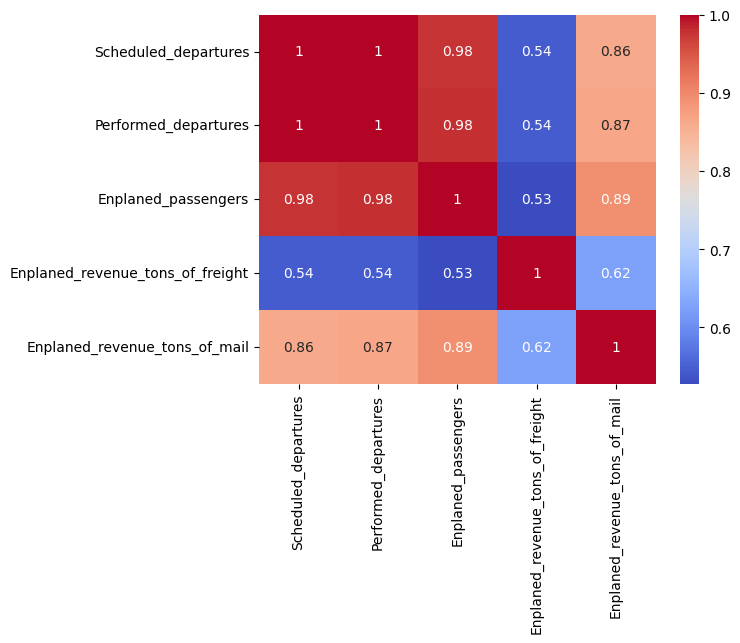

In [26]:
# Рассчет попарных коэффициентов корреляции
correlation_matrix = data[variables].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

___


In [27]:
# Определение ширины каждого поля
colspecs = [
    (0, 8),    # Time of birth
    (8, 16),   # Sex of the child
    (16, 24),  # Birth weight in grams
    (24, 32)   # Number of minutes after midnight of each birth
]

# Определение имен колонок
column_names = [
    "Time_of_birth", "Sex", "Birth_weight", "Minutes_after_midnight"
]

# Загрузка данных
data = pd.read_fwf('data/babyboom.dat.txt', colspecs=colspecs, header=None, names=column_names)

data

,Time_of_birth,Sex,Birth_weight,Minutes_after_midnight
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177
5,405,1,2208,245
6,407,1,1745,247
7,422,2,2846,262
8,431,2,3166,271
9,708,2,3520,428


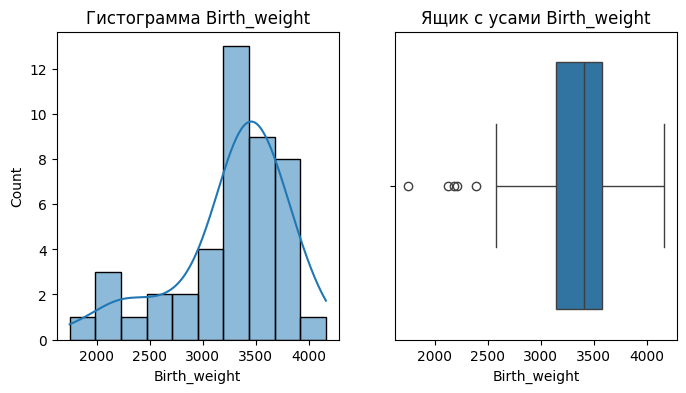

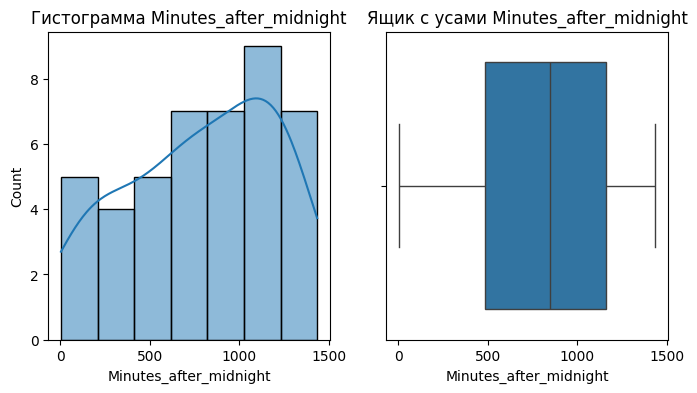

In [ ]:
#Выбор переменных для анализа
variables = ["Birth_weight", "Minutes_after_midnight"]

# Построение гистограмм и ящиков с усами
for var in variables:
    plt.figure(figsize=(8, 4))
    
    # Гистограмма
    plt.subplot(1, 2, 1)
    sns.histplot(data[var], kde=True)
    plt.title(f'Гистограмма {var}')
    
    # Ящик с усами
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[var])
    plt.title(f'Ящик с усами {var}')
    
    plt.show()

1. Переменная Birth_weight (Вес при рождении):

    Гистограмма:

    Распределение данных в гистограмме похоже на ннормальное показывает небольшую правую асимметрию.
    Основная масса данных сосредоточена в диапазоне между 3000 и 4000 граммами.

        
    Ящик с усами:

    Медиана расположена ближе к верхней части ящика, что также подтверждает несимметричное распределение.
    Первый квартиль примерно на уровне 3000 грамм, а третий квартиль около 3700 грамм.
    Усики распространяются от 2500 до 4000 грамм, что охватывает значительную часть данных.
    Несколько выбросов (кружки) находятся на уровне около 2000-2500 грамм.

2. Переменная Minutes_after_midnight (Минуты после полуночи):

    Гистограмма:

    Распределение по переменной Minutes_after_midnight выглядит ближе к равномерному распределению, также в какой томере похоже на нормальное рапределение, с небольшой правой асимметрией. Большинство данных сосредоточено между 500 и 1200 минутами (8:00 - 20:00).
    Пик распределения находится около 1000 минут (16-17).


    Ящик с усами:

    Медиана расположена близко к центру ящика, что говорит о более симметричном распределении данных по сравнению с весом при рождении.
    Первый квартиль находится примерно на уровне 500 минут, а третий квартиль — на уровне 1200 минут.
    Усики охватывают весь диапазон данных, что указывает на отсутствие значительных выбросов. Распределение выглядит нормальным и сбалансированным.

In [29]:
# Рассчет числовых характеристик и описательной статистики
desc_stats = data[variables].describe().T
desc_stats['variance'] = data[variables].var()
desc_stats['median'] = data[variables].median()

desc_stats

,count,mean,std,min,25%,50%,75%,max,variance,median
Birth_weight,44.0,3275.954545,528.032458,1745.0,3141.50,3404.0,3571.75,4162.0,278818.276956,3404.0
Minutes_after_midnight,44.0,788.727273,416.066931,5.0,482.75,846.5,1158.50,1435.0,173111.691332,846.5


<Axes: >

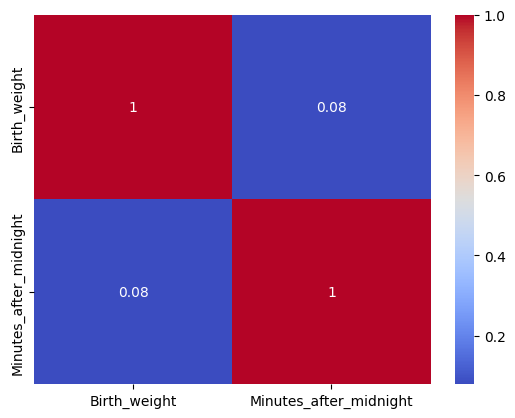

In [30]:
correlation_matrix = data[variables].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Женщины


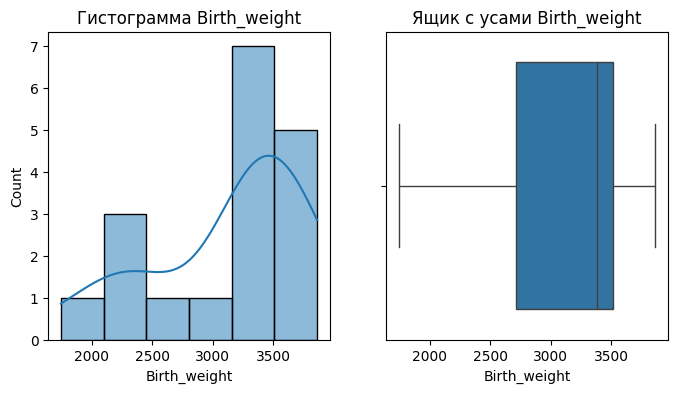

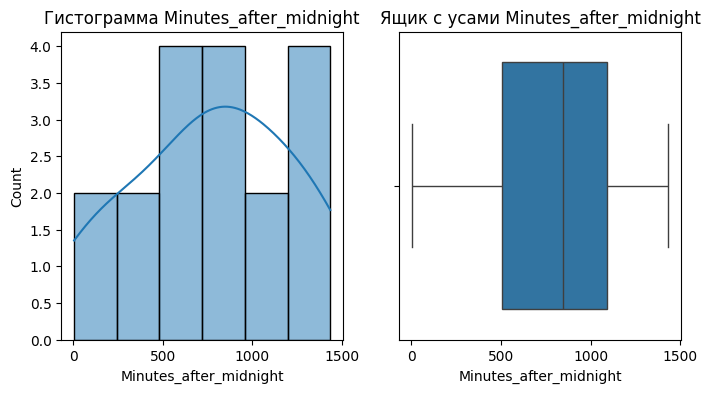

Мужчины


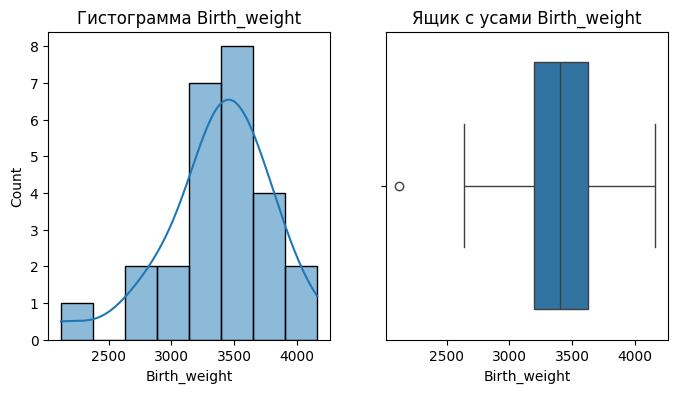

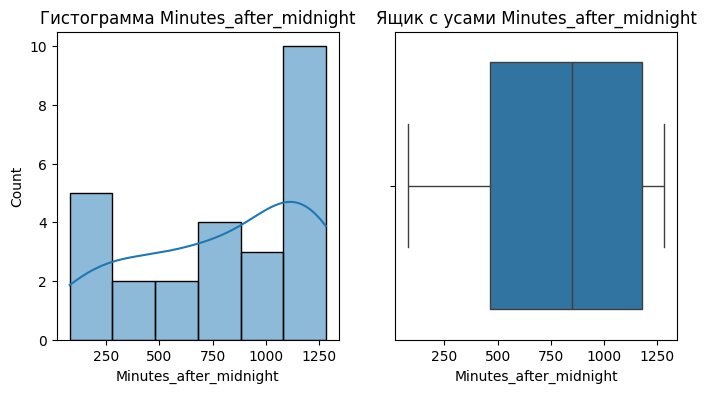

In [31]:
#Сделаем отдельно для каждого пола

# Построение гистограмм и ящиков с усами
for sex in (1, 2):
    print("Мужчины" if sex == 2 else "Женщины")
    for var in variables:
        plt.figure(figsize=(8, 4))
        
        # Гистограмма
        plt.subplot(1, 2, 1)
        sns.histplot(data[data["Sex"] == (sex)][var], kde=True)
        plt.title(f'Гистограмма {var}')
        
        # Ящик с усами
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[data["Sex"] == (sex)][var])
        plt.title(f'Ящик с усами {var}')
        
        plt.show()

In [32]:
# Рассчет числовых характеристик и описательной статистики
for sex in (1, 2):
    print("Мужчины" if sex == 2 else "Женщины")
    desc_stats = data[data["Sex"] == (sex)][variables].describe().T
    desc_stats['variance'] = data[data["Sex"] == (sex)][variables].var()
    desc_stats['median'] = data[data["Sex"] == (sex)][variables].median()
    print(desc_stats, end='\n\n')
    print("_"* 100)

Женщины
                        count         mean         std     min      25%  \
Birth_weight             18.0  3132.444444  631.582534  1745.0  2711.00   
Minutes_after_midnight   18.0   773.000000  446.050775     5.0   507.75   

                           50%      75%     max       variance  median  
Birth_weight            3381.0  3517.25  3866.0  398896.496732  3381.0  
Minutes_after_midnight   846.5  1094.25  1435.0  198961.294118   846.5  

____________________________________________________________________________________________________
Мужчины
                        count         mean         std     min      25%  \
Birth_weight             26.0  3375.307692  428.046051  2121.0  3198.00   
Minutes_after_midnight   26.0   799.615385  402.687281    78.0   464.25   

                           50%      75%     max       variance  median  
Birth_weight            3404.0  3628.75  4162.0  183223.421538  3404.0  
Minutes_after_midnight   849.5  1177.50  1283.0  162157.046154   